In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
#import networkx as nx
#from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random
import isomap

In [2]:
file = '../../data/isomap/isomap.mat'
images = loadmat(file)['images']
(d, n) = np.shape(images)

In [3]:
A,Z = isomap.isomap(file)

### Plot the Adjacency Matrix by Intensity

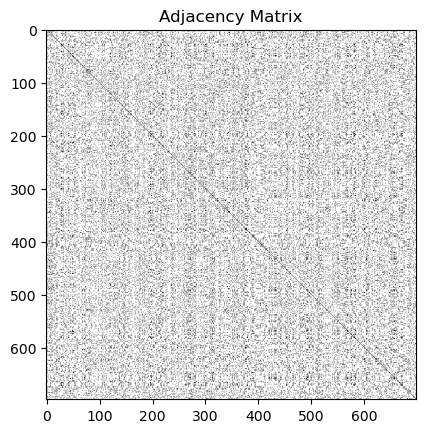

In [5]:
plt.figure()
plt.title('Adjacency Matrix')
plt.imshow(A,cmap=plt.get_cmap('gray'))

### Plot a random sample of images

In [ ]:
# function to visualize the projected dataset
def plot_faces(z, sample, images):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(z[:, 0], z[:, 1], '.k')
    for i in sample:
        single_image = images[:, i].reshape(64, 64).T

        imagebox = OffsetImage(single_image, zoom=0.6, cmap = 'gray')
        ab = AnnotationBbox(imagebox, z[i], pad=0.1)
        ax.add_artist(ab)

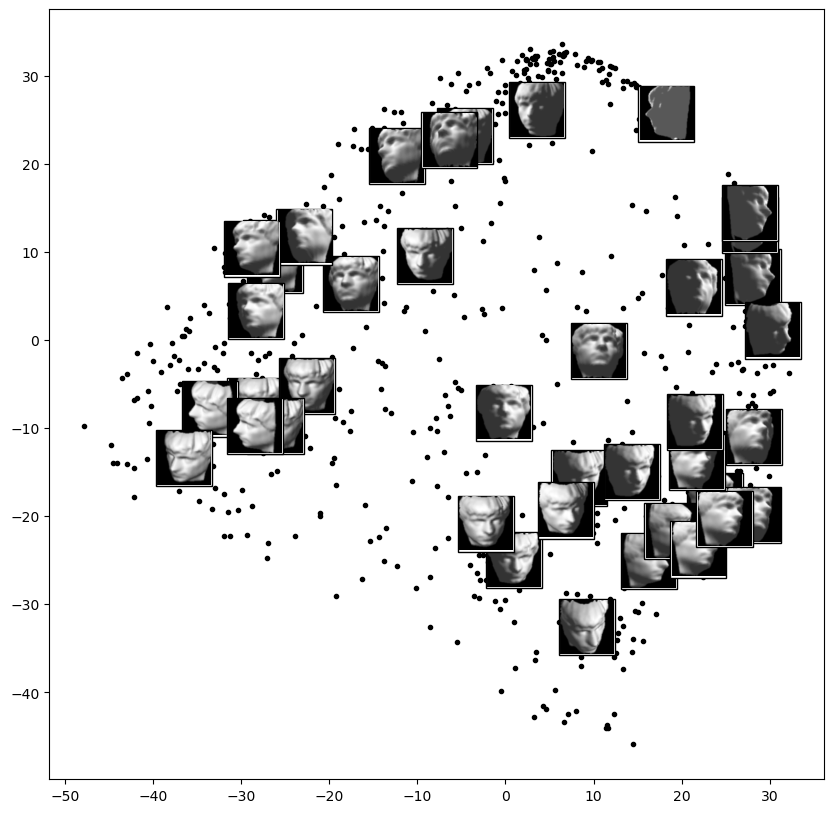

In [9]:
# Add photos
sample = random.sample(range(n), 40)
isomap.plot_faces(Z,sample,images)

### Compare with PCA implementation

In [10]:
from sklearn.decomposition import PCA
# apply PCA using sklearn
pca = PCA(n_components = 2)
pca.fit(images.T)
images_new = pca.transform(images.T)

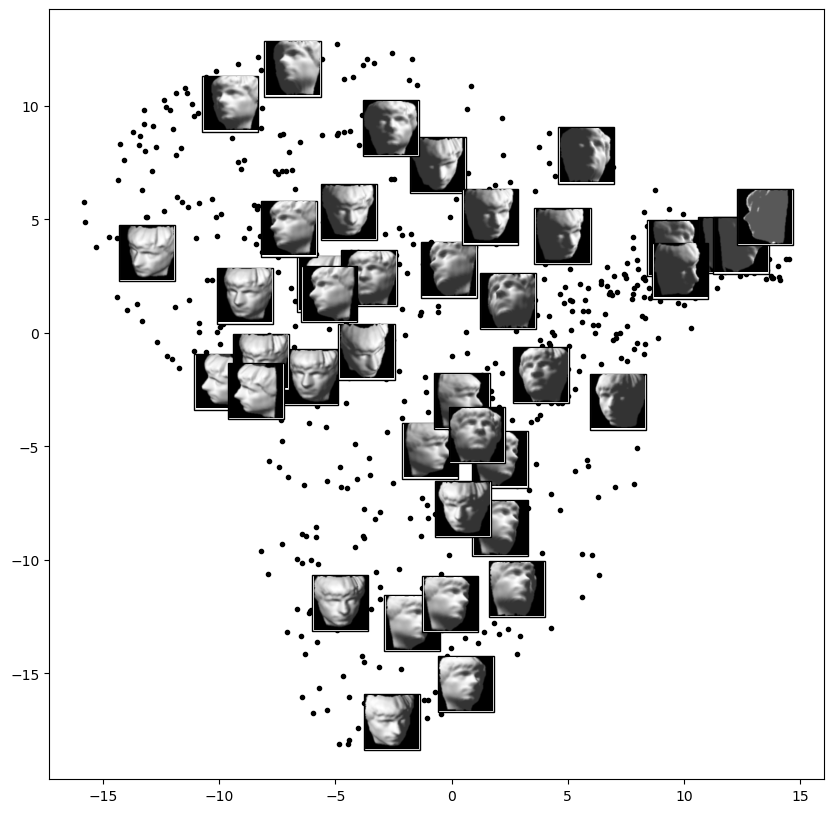

In [11]:
isomap.plot_faces(-images_new, sample,images)